In [64]:
import jieba 
import numpy as np
import pandas as pd
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim import models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# 停用词表加载方法
def get_stopword_list():
    # 停用词表存储路径，每一行为一个词，按行读取进行加载
    # 进行编码转换确保匹配准确率
    stop_word_path = 'stopword.txt'
    stopword_list = [sw.replace('\n', '') for sw in open(stop_word_path,encoding='utf-8').readlines()]
    return stopword_list

# 分词方法，调用结巴接口
def seg_to_list(sentence, pos=False):
    if not pos:
        # 不进行词性标注的分词方法
        seg_list = jieba.cut(sentence)
    else:
        # 进行词性标注的分词方法
        seg_list = psg.cut(sentence)
    return seg_list

# 去除干扰词
def word_filter(seg_list, pos=False):
    stopword_list = get_stopword_list()
    filter_list = []
    # 根据POS参数选择是否词性过滤
    ## 不进行词性过滤，则将词性都标记为n，表示全部保留
    for seg in seg_list:
        if not pos:
            word = seg
            flag = 'n'
        else:
            word = seg.word
            flag = seg.flag
        if not flag.startswith('n'):
            continue
        # 过滤停用词表中的词，以及长度为<2的词
        if not word in stopword_list and len(word) > 1:
            filter_list.append(word)
    return filter_list

In [43]:
def load_data(corpus_path,pos=False):
    # 调用上面方式对数据集进行处理，处理后的每条数据仅保留非干扰词
    text=pd.read_csv(corpus_path)
    doc_list = []
    for index,line in text.iterrows():
        content = line['comment'].strip()
        seg_list = seg_to_list(content, pos)
        filter_list = word_filter(seg_list, pos)
        doc_list.append(filter_list)
    return doc_list

In [105]:
filename1="美的（Midea）JSQ22-L1(Y)_comment.csv"
filename2="海尔（Haier）EC6003-JT1(U1) _comment.csv"
filename3="史密斯（A.O.SMITH）E80VDP_comment.csv"

texts1=load_data(filename1)
texts2=load_data(filename2)
texts3=load_data(filename3)
texts=texts1+texts2+texts3
split=[]
split.append(len(texts1))
split.append(len(texts1)+len(texts2))

In [106]:

for line in texts:
    print(line)

['安装费', '要命']
['点火', '反应', '有点', '有时候', '几次', '火才', '点燃']
['花洒', '没有', '清楚']
['美的', '热水器', '美的', '热水器', '现在', '换机', '收费']
['商品', '使用', '不久', '问题', '商家', '配合', '更换', '维修']
['热水', '声音', '里面', '螺丝', '没有', '松松']
['物流', '确实', '挺快', '快递', '送到', '楼下', '说好', '送货上门', '安装', '安装', '追评']
['安装', '实际', '借口', '安装', '安装费', '霸王']
['安装', '服务', '理由', '推脱', '安装', '最后', '安装', '一个', '安装', '服务', '安装']
['东西', '收到', '安装', '使用', '知道', '效果', '安装费', '有点', '建议', '好好', '考虑', '考虑']
['售后', '安装', '试用', '热水器', '进水', '地方', '漏水', '一分钱', '一分货']
['没用', '几次', '烧坏']
['安装', '服务', '安装', '不了', '运费', '退回', '以后', '再也', '不要', '美的', '东西']
['厂家', '不包', '安装', '请人', '安装', '不敢', '退货', '支付', '运费', '约元', '12L', '效果', '10L', '相同', '温度', '稳定', '接受', '后悔', '一次', '购物', '使用']
['看看', '800', '热水器', '安装费', '545']
['拿到', '竟然', '感觉', '用过', '安装', '计较']
['出水', '速度', '一般般', '几分钟', '热水', '安装', '服务', '安装', '费用', '外面', '贵多', '耗材', '差不多', '200', '恒温', '效果']
['产品', '没用', '感觉', '套路', '满满的', '之前', '赠品', '完后', '必须', '好评', '赠品', '感觉', '一波', '智商']
['水箱', '漏水',

In [107]:
# 建立字典构建词空间
dictionary = Dictionary(texts)
# 使用BOW模型向量化
corpus = [dictionary.doc2bow(text) for text in texts]

In [80]:
# model = ldamodel.LdaModel(corpus,id2word=dictionary,iterations=10000,num_topics=3,alpha='auto')
# # 展示主题中的主题词，推断主题大致内容
# topics=model.show_topics(num_words=10)
# topics
# type(model)

gensim.models.ldamodel.LdaModel

In [81]:

c_v_coherence=[]
for i in range(1,10):
    model = ldamodel.LdaModel(corpus,id2word=dictionary,iterations=5000,num_topics=i,alpha='auto')
    cm =CoherenceModel(model=model,texts=texts,dictionary=dictionary,coherence='c_v')
    print(i)
    c_v_coherence.append(cm.get_coherence())

1
2
3
4
5
6
7
8
9


In [82]:
u_mass_coherence=[]
for i in range(1,10):
    model = ldamodel.LdaModel(corpus,id2word=dictionary,iterations=5000,num_topics=i,alpha='auto')
    cm =CoherenceModel(model=model,texts=texts,dictionary=dictionary,coherence='u_mass')
    print(i)
    u_mass_coherence.append(cm.get_coherence())

1
2
3
4
5
6
7
8
9


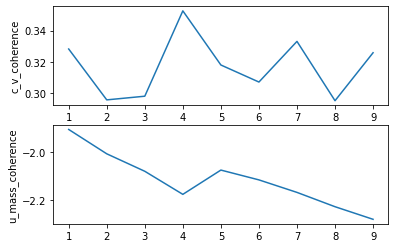

In [83]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(range(1,10),c_v_coherence,label="c_v")
plt.ylabel("c_v_coherence")
plt.subplot(2, 1, 2)
plt.plot(range(1,10),u_mass_coherence,label="u_mass")
plt.ylabel("u_mass_coherence")
plt.show()

In [108]:
model = ldamodel.LdaModel(corpus,id2word=dictionary,iterations=5000,num_topics=5,alpha='auto')
# 展示主题中的主题词，推断主题大致内容
topics=model.show_topics(num_words=10)
topics

[(0,
  '0.034*"安装" + 0.020*"最后" + 0.019*"晚上" + 0.017*"今天" + 0.017*"新房" + 0.016*"刚到" + 0.016*"多才" + 0.016*"崩溃" + 0.015*"物流" + 0.012*"很快"'),
 (1,
  '0.099*"安装" + 0.051*"师傅" + 0.032*"热水器" + 0.029*"史密斯" + 0.023*"专业" + 0.023*"产品" + 0.017*"品牌" + 0.016*"态度" + 0.015*"送货" + 0.012*"技术"'),
 (2,
  '0.067*"安装" + 0.025*"使用" + 0.023*"降低" + 0.020*"相当" + 0.020*"速度" + 0.019*"一下" + 0.019*"热水器" + 0.018*"棒棒" + 0.017*"到位" + 0.016*"讲解"'),
 (3,
  '0.016*"热水器" + 0.013*"满意" + 0.010*"安装" + 0.010*"不错" + 0.008*"很快" + 0.006*"师傅" + 0.006*"服务" + 0.006*"使用" + 0.005*"外观" + 0.005*"质量"'),
 (4,
  '0.104*"安装" + 0.060*"师傅" + 0.043*"服务" + 0.021*"外观" + 0.020*"上门" + 0.019*"漂亮" + 0.019*"准时" + 0.018*"外形" + 0.016*"速度" + 0.016*"物流"')]

In [109]:
topic_list=[]
for topic in topics:
    a=topic[1].split("\"")
    des=[]
    for i,word in enumerate(a):
        if i%2==1:
            des.append(word)
    topic_list.append("/".join(des))
print(topic_list)

['安装/最后/晚上/今天/新房/刚到/多才/崩溃/物流/很快', '安装/师傅/热水器/史密斯/专业/产品/品牌/态度/送货/技术', '安装/使用/降低/相当/速度/一下/热水器/棒棒/到位/讲解', '热水器/满意/安装/不错/很快/师傅/服务/使用/外观/质量', '安装/师傅/服务/外观/上门/漂亮/准时/外形/速度/物流']


In [110]:
all_topics = model.get_document_topics(corpus,per_word_topics=True)

In [111]:
np.zeros((3,5),dtype=int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [112]:
index=0
total=np.zeros((3,5),dtype=int)
for doc_topics,word_topics,phi_values in all_topics:
    print('文档序号:{}\n'.format(index),texts[index])
#     doc_topics = [(topic_list[i[0]],i[1]) for i in doc_topics ]
    print(" 文档主题:",doc_topics)
    
    max_p=0
    most_topic=0
    for idx,p in doc_topics:
        if p>max_p:
            max_p=p
            most_topic=idx
    if index<split[0]:
        total[0][most_topic]+=1
    else:
        if index<split[1]:
            total[1][most_topic]+=1
        else:
            total[2][most_topic]+=1
    index+=1

文档序号:0
 ['安装费', '要命']
 文档主题: [(0, 0.030618489), (1, 0.83735853), (2, 0.032467563), (3, 0.02571802), (4, 0.07383743)]
文档序号:1
 ['点火', '反应', '有点', '有时候', '几次', '火才', '点燃']
 文档主题: [(0, 0.9351036), (1, 0.020163625), (2, 0.0109846415), (4, 0.02504722)]
文档序号:2
 ['花洒', '没有', '清楚']
 文档主题: [(0, 0.86130863), (1, 0.042696405), (2, 0.023288004), (3, 0.01844669), (4, 0.054260306)]
文档序号:3
 ['美的', '热水器', '美的', '热水器', '现在', '换机', '收费']
 文档主题: [(0, 0.62770844), (1, 0.32749832), (2, 0.010975093), (4, 0.025124708)]
文档序号:4
 ['商品', '使用', '不久', '问题', '商家', '配合', '更换', '维修']
 文档主题: [(1, 0.017814586), (2, 0.9421973), (4, 0.023161197)]
文档序号:5
 ['热水', '声音', '里面', '螺丝', '没有', '松松']
 文档主题: [(0, 0.011927619), (1, 0.023268277), (2, 0.012647891), (3, 0.92326725), (4, 0.02888892)]
文档序号:6
 ['物流', '确实', '挺快', '快递', '送到', '楼下', '说好', '送货上门', '安装', '安装', '追评']
 文档主题: [(0, 0.78172386), (1, 0.18873972), (4, 0.01666985)]
文档序号:7
 ['安装', '实际', '借口', '安装', '安装费', '霸王']
 文档主题: [(0, 0.011955948), (1, 0.9363277), (2, 0.012677868),

 ['海尔', '美的', '之间', '好久', '美的', '售后', '不错', '服务周到', '贴心', '操作', '简单', '师傅', '安装', '准时', '小时', '弄完', '试了试', '热水器', '加热', '很快', '温度', '稳定', '态度', '礼貌', '收拾', '干净', '离开', '感觉', '这种', '牌子', '保障']
 文档主题: [(0, 0.33279723), (1, 0.65640527)]
文档序号:167
 ['外形', '外观', '合适', '大方', '好看', '恒温', '效果', '供水', '很快', '噪音', '大小', '声音', '大白天']
 文档主题: [(1, 0.0112717375), (3, 0.45147023), (4, 0.52536386)]
文档序号:168
 ['外观', '时尚', '大方', '装在', '家里', '好看', '触摸', '按键', '方便', '银色', '家里', '风格', '声音', '比较', '下次', '美的', '品牌', '售后服务', '比较']
 文档主题: [(0, 0.8923376), (4, 0.09223954)]
文档序号:169
 ['热水器', '安装', '一下', '出水', '效果', '温度', '控制', '效果', '不错']
 文档主题: [(1, 0.016021894), (2, 0.94871885), (4, 0.020202026)]
文档序号:170
 ['燃气', '热水器', '价廉物美', '性能', '稳定', '洗澡', '舒服', '真的', '品牌', '实力', '美的', '名不虚传']
 文档主题: [(1, 0.96676964), (4, 0.015133118)]
文档序号:171
 ['外形', '外观', '外形', '简洁', '大方', '恒温', '效果', '温度', '调好', '一直', '恒温', '出水', '不错', '噪音', '大小', '声音', '出水', '速度', '比较']
 文档主题: [(4, 0.98055315)]
文档序号:172
 ['特意', '使用', '几天', '评价', '外观'

文档序号:337
 ['送货', '很快', '下单', '第二天', '送到', '安装', '师傅', '打电话', '半小时', '来到', '专业', '认真', '热水器', '谢谢你们', '热情', '服务', '敬业精神', '热水器', '质量', '下次', '买房子', '我会', '继续', '美的', '热水器']
 文档主题: [(1, 0.38879678), (3, 0.59730655)]
文档序号:338
 ['美的', '不愧', '品牌', '双十', '一买', '天才', '安上', '描述', '热水', '很快', '颜色', '款式', '喜欢', '特别', '提到', '安装', '王师傅', '服务周到', '热情', '服务质量', '完全', '体现', '品牌', '规范', '值得', '依赖', '美的', '五分', '好评']
 文档主题: [(1, 0.6675308), (2, 0.32111746)]
文档序号:339
 ['快递', '速度', '超快', '货物', '质量', '购买']
 文档主题: [(0, 0.011922944), (1, 0.4617358), (2, 0.487031), (3, 0.010014675), (4, 0.029295513)]
文档序号:340
 ['品牌', '值得', '信赖', '一直', '牌子', '安装', '试机', '效果', '很棒', '热水', '出水', '很快', '恒温', '不会', '忽冷忽热', '声音', '很小', '不会', '太吵人', '物流', '安装', '服务', '方便', '幸好', '机器', '预留', '位置', '离出', '烟口', '比较', '浪费', '很多', '接管', '安装工', '浪费', '材料', '喜欢', '京东', '买买', '方便', '实惠', '装修', '电器', '京东', '全包']
 文档主题: [(1, 0.8456651), (4, 0.1493419)]
文档序号:341
 ['外形', '外观', '看着', '不错', '高大', '恒温', '效果', '噪音', '大小', '声音', '很小', '出水', '速度', '

文档序号:504
 ['安装', '效果', '不错', '屏显', '很大', '热水']
 文档主题: [(0, 0.011925389), (1, 0.023376526), (2, 0.9255517), (3, 0.010016648), (4, 0.029129755)]
文档序号:505
 ['东西', '水温', '稳定', '师傅', '安装', '用心']
 文档主题: [(0, 0.011921147), (1, 0.93633825), (2, 0.012641625), (3, 0.010013078), (4, 0.029085938)]
文档序号:506
 ['热水器', '安装', '使用方便', '恒温', '静音', '价格', '实惠', '满意', '五分', '好评']
 文档主题: [(1, 0.014479107), (2, 0.9536227), (4, 0.018264908)]
文档序号:507
 ['京东', '速度', '快刚', '到货', '安装', '已经', '几天', '很快', '特别', '物有所值']
 文档主题: [(1, 0.64454573), (4, 0.3339354)]
文档序号:508
 ['外形', '外观', '简单', '时尚', '操作', '出水', '速度', '不错', '很快', '恒温', '效果', '棒棒', '噪音', '大小', '一点点', '接受', '知道', '点火']
 文档主题: [(0, 0.24302574), (2, 0.18611278), (4, 0.5590668)]
文档序号:509
 ['美的', '品牌', '值得', '信赖', '东西', '棒极了', '美观', '大气', '上档次', '品牌', '便宜', '安装', '师傅', '比较', '专业', '特别感谢', '打电话', '安排', '安装', '师傅', '哪位', '小姐', '及时', '安装', '明天', '时间', '今天上午', '收到', '下午', '三点', '左右', '装好']
 文档主题: [(1, 0.22856568), (4, 0.7644496)]
文档序号:510
 ['美的', '用户', '之前', '一个', '

 ['物流', '很快', '客服', '热心', '回复', '速度', '很快', '安装', '师傅', '热情', '专业', '五分', '好评']
 文档主题: [(1, 0.6062011), (2, 0.36898917), (4, 0.014189532)]
文档序号:672
 ['产品', '手机', '合适', '不上', '出水', '水温', '稳定', '洗澡', '够用']
 文档主题: [(0, 0.65579325), (1, 0.30826572), (4, 0.020381097)]
文档序号:673
 ['性价比', '物流', '上门', '安装', '速度', '很快', '师傅', '安装', '专业', '试用', '效果']
 文档主题: [(1, 0.013247201), (4, 0.9671227)]
文档序号:674
 ['起来', '方便', '便宜', '不错', '售后服务']
 文档主题: [(0, 0.014062559), (1, 0.027416693), (2, 0.014911835), (3, 0.9092251), (4, 0.03438375)]
文档序号:675
 ['安装', '服务', '态度']
 文档主题: [(0, 0.021944044), (1, 0.042997032), (2, 0.023269493), (3, 0.018432083), (4, 0.89335734)]
文档序号:676
 ['价格', '实惠', '安装', '师傅', '服务', '到位', '目前', '使用']
 文档主题: [(1, 0.01785981), (2, 0.9426638), (4, 0.02266352)]
文档序号:677
 ['热水器', '用水量', '物流', '服务态度', '值得', '购买']
 文档主题: [(0, 0.011935847), (1, 0.93608826), (2, 0.012656665), (3, 0.010025561), (4, 0.029293671)]
文档序号:678
 ['高端', '大气', '送货', '很快', '安装', '师傅', '服务']
 文档主题: [(0, 0.0103453295), (1, 0.0

文档序号:864
 ['父母亲', '老人家', '水量', '大开', '热水', '看着', '外观', '好看', '表扬', '安装', '服务', '专业', '速度', '一个']
 文档主题: [(1, 0.21215466), (4, 0.77222073)]
文档序号:865
 ['外形', '外观', '做工', '精细', '恒温', '效果', '恒温', '效果', '不错', '水压', '启动', '次要', '安装', '便宜']
 文档主题: [(1, 0.010563571), (3, 0.6888837), (4, 0.28944433)]
文档序号:866
 ['外形', '外观', '提前', '过年', '安装', '安装', '简单', '外形', '美观', '声音', '值得', '购买', '实惠']
 文档主题: [(1, 0.9690898), (4, 0.014168626)]
文档序号:867
 ['火力', '很大', '水温', '稳定', '安装', '方便', '大厂', '产品']
 文档主题: [(0, 0.94218063), (1, 0.018022113), (4, 0.022422971)]
文档序号:868
 ['外形', '外观', '恒温', '效果', '有试', '过断', '热水', '现象', '噪音', '大小', '出水', '速度', '热水', '后悔', '没买', '冷水', '机器', '安装', '服务', '不错', '耗能', '情况', '清楚']
 文档主题: [(4, 0.98381037)]
文档序号:869
 ['效果', '推荐']
 文档主题: [(0, 0.030492602), (1, 0.8359632), (2, 0.032335076), (3, 0.025612416), (4, 0.07559675)]
文档序号:870
 ['美观', '大气', '热水', '稳定', '安装']
 文档主题: [(0, 0.014062201), (1, 0.92473614), (2, 0.014912217), (3, 0.01181145), (4, 0.034477964)]
文档序号:871
 ['恒温', '效果', '水温'

文档序号:1040
 ['热水器', '今天', '装好', '想象', '高大', '煤气', '热水器', '用电', '方便']
 文档主题: [(1, 0.01602464), (4, 0.9602098)]
文档序号:1041
 ['外形', '外观', '漂亮', '必须', '加热', '速度', '够用', '耗能', '情况', '变频', '一级', '能效', '很省', '洗浴', '时间', '六倍', '增容', '特色', '家里', '一直', '海尔']
 文档主题: [(4, 0.98238397)]
文档序号:1042
 ['海尔', '品牌', '值得', '信赖', '外观', '颜色', '实物', '色差', '安装', '师傅', '专业', '辛苦', '安装', '漂亮']
 文档主题: [(1, 0.22804655), (4, 0.75636107)]
文档序号:1043
 ['热水器', '好看', '加热', '速度', '不错', '安装', '师傅', '专业']
 文档主题: [(1, 0.9507495), (4, 0.022748385)]
文档序号:1044
 ['自动', '加热', '热水器', '加热', '速度', '很快', '保温', '效果', '真的', '前一晚', '热水', '第二天', '继续', '一个', '遥控器', '远程', '操控', '方便', '热水器', '功能', '简单', '易懂', '实在', '售前', '售后服务', '不错', '送货', '预约', '安装', '迅速', '安装', '免费', '安装', '师傅', '技术', '一流']
 文档主题: [(1, 0.7504931), (4, 0.24329259)]
文档序号:1045
 ['热水器', '相信', '海尔', '相信', '京东', '品牌', '值得', '信赖', '以后', '还会', '选择', '京东', '选择', '海尔']
 文档主题: [(1, 0.9713502), (4, 0.013062134)]
文档序号:1046
 ['热水器', '省力', '省时', '质量', '耗能', '品牌', '大小', '合适', '方便', '安装',

文档序号:1183
 ['一个月', '评价', '不错', '试过', '远程', '控制', '功能强大', '安装', '师傅', '耐心', '负责', '赠送', '浴巾', '不错', '抢到', '厨宝', '意外', '特别', '惊喜']
 文档主题: [(1, 0.97856396)]
文档序号:1184
 ['物流', '很快', '双十', '购买', '当天', '收到', '安装', '一下', '热水', '很快', '外观', '上档次', '值得', '拥有']
 文档主题: [(1, 0.21566856), (2, 0.54775864), (4, 0.2266829)]
文档序号:1185
 ['物流', '速度', '送货', '上楼', '安装', '师傅', '热心', '主动', '联系', '核对', '安装时间', '上班', '安装', '干净', '卫生', '安装', '现场', '收拾', '干净', '讲解', '热水器', '操作', '知道', '满意']
 文档主题: [(1, 0.9828831)]
文档序号:1186
 ['京东', '自营', '商品', '品质', '保证', '值得', '信赖', '热水器', '突然', '爆裂', '马上', '春节', '没有', '热水', '方便', '立即', '京东', '下单', '选了', '这款', '质量', '品牌', '史密斯', '热水器', '容量', '加热', '效果', '今天', '安装', '小哥', '过来', '安装', '60L', '拆下来', '新买', '80L', '原来', '尺寸', '小哥', '吊顶', '拆除', '一部分', '细心地', '热水器', '安装', '小哥', '服务', '热情', '周到', '细心', '必须', '一个']
 文档主题: [(0, 0.17353517), (4, 0.8207088)]
文档序号:1187
 ['外形', '外观', '金色', '很漂亮', '大气', '圆滚滚', '可爱', '加热', '速度', '挺快', '十几分钟', '洗澡', '耗能', '情况', '比较', '节能', '实测', '洗浴', '时间', '挺长'

文档序号:1316
 ['东西', '收到', '外地', '调货', '过来', '家电', '快递', '客服', '一直', '联系', '售后', '安装', '卫生间', '迟些', '天来', '安装', '礼品', '满意', '肯定', '好评']
 文档主题: [(1, 0.18187903), (4, 0.80705553)]
文档序号:1317
 ['机器', '样子', '时尚', '秒杀', '合适', '赠送', '一个', '音响', '安装', '师傅', '专业', '服务', '京东', '给力']
 文档主题: [(1, 0.9710709), (4, 0.013325466)]
文档序号:1318
 ['外形', '外观', '最初', '这款', '外观', '时尚', '大气', '加热', '速度', '耗能', '情况', '具体', '电量', '没有', '测试', '洗浴', '时间', '特意', '80', '完全', '够用']
 文档主题: [(0, 0.2249921), (4, 0.761013)]
文档序号:1319
 ['外形', '外观', '很漂亮', '颜色', '喜欢', '加热', '速度', '加热', '速度', '时效', '耗能', '情况', '正在', '体验', '特色', '安装', '师傅', '干活', '效率高', '大赞', '好评']
 文档主题: [(4, 0.98230064)]
文档序号:1320
 ['师傅', '上门', '安装', '准时', '耐心', '指导', '使用', '帮忙', '作地线', '服务', '一流', '品牌', '值得', '信任']
 文档主题: [(0, 0.26106265), (1, 0.19292931), (4, 0.5357879)]
文档序号:1321
 ['外形', '外观', '金色', '很漂亮', '高大', '加热', '速度', '使用', '两天', '家人', '连续', '洗澡', '完全', '不用', '担心', '热水', '洗衣', '刷碗', '全程', '热水', '耗能', '情况', '特意', '检测', '一天', '电量', '感觉', '预期', '还省', '特色

文档序号:1476
 ['收到', '超级', '安装', '师傅', '全程', '指导', '使用', '五星', '好评', 'hellip', 'hellip']
 文档主题: [(1, 0.013197817), (2, 0.27540115), (4, 0.69894564)]
文档序号:1477
 ['安装', '特别', '师傅', '细心', '认真', '讲解', '使用', '注意', '品牌', '值得', '信赖']
 文档主题: [(1, 0.3853795), (4, 0.59498453)]
文档序号:1478
 ['外形', '外观', '完美', '特色', '安装', '师傅', '认真', '安装', '完美']
 文档主题: [(1, 0.015943626), (4, 0.96032494)]
文档序号:1479
 ['产品', '外观设计', '时尚', '做工', '精致', '操作', '比较简单', '物流', '很快', '送货', '师傅', '态度', '愉快', '一次', '购物']
 文档主题: [(0, 0.17167152), (1, 0.8064894), (4, 0.01227476)]
文档序号:1480
 ['热水器', '功能', '齐全', '智能', '安装', '师傅', '专业', '满分']
 文档主题: [(1, 0.017879365), (4, 0.95560926)]
文档序号:1481
 ['外形', '外观', '大气', '加热', '速度', '安装', '试用', '耗能', '情况', '清楚', '洗浴', '时间', '应该', '不错', '特色', '安装', '单位']
 文档主题: [(0, 0.19433236), (4, 0.78849304)]
文档序号:1482
 ['外形', '外观', '好看', '图片', '好看', '加热', '速度', '没试', '牌子', '相信', '特色', '售后服务', '十分', '强大', '太好了', '洗浴', '时间', '80', '足够', '泡澡']
 文档主题: [(2, 0.97618043)]
文档序号:1483
 ['安装', '成功', '安装', '师傅', '负责', 

文档序号:1651
 ['不错', '服务', '周到', '安装', '仔细']
 文档主题: [(0, 0.01406234), (1, 0.027659643), (2, 0.014912012), (3, 0.011811654), (4, 0.9315544)]
文档序号:1652
 ['送货', '很快', '价格', '实惠', '好几', '安装', '满意', '材料', '满意', '服务满意']
 文档主题: [(1, 0.014517082), (3, 0.7243558), (4, 0.24585849)]
文档序号:1653
 ['热水器', '安装', '完成', '外观', '漂亮', '高端', '大气', '上档次', '期待', '使用', '效果', '师傅', '服务态度', '满意']
 文档主题: [(1, 0.010489579), (2, 0.36903414), (4, 0.61058795)]
文档序号:1654
 ['性价比', '价能', '质量', '不错', '安装', '师傅', '手工']
 文档主题: [(0, 0.010368868), (1, 0.944593), (2, 0.0109954085), (4, 0.025333298)]
文档序号:1655
 ['高端', '大气', '上档次', '安装', '人员', '服务态度', '特别']
 文档主题: [(0, 0.010345253), (1, 0.020210804), (2, 0.9352908), (4, 0.025463603)]
文档序号:1656
 ['东西', '售后服务', '到位', '安装', '师傅', '服务态度']
 文档主题: [(0, 0.011921615), (1, 0.023330383), (2, 0.012642042), (3, 0.010013499), (4, 0.9420924)]
文档序号:1657
 ['物流', '速度', '及时', '安装', '师傅', '准时', '上门', '专业', '服务', '满意', '产品', '功能', '讲解', '到位']
 文档主题: [(1, 0.13074085), (4, 0.85367256)]
文档序号:1658
 ['外形'

文档序号:1829
 ['一体式', '上门', '服务', '一流', '朋友', '介绍', '相当', '好用', '加热', '很快', '值得', '购买']
 文档主题: [(1, 0.23780593), (3, 0.22122759), (4, 0.5281233)]
文档序号:1830
 ['没有', '使用', '使用', '评价', '安装', '已经', '完成', '安装', '师傅', '服务', '不错']
 文档主题: [(1, 0.013240577), (2, 0.9575874), (4, 0.01671957)]
文档序号:1831
 ['挺好用', '发货', '很快', '安装', '加热', '速度', '很快', '暖和', '谢谢']
 文档主题: [(1, 0.015997646), (2, 0.9487309), (4, 0.020206252)]
文档序号:1832
 ['第一次', '品牌', '确实', '不错', '外观设计', '时尚', '水温', '舒适', '容量', '值得', '购买']
 文档主题: [(0, 0.61181813), (1, 0.3587802), (4, 0.016535643)]
文档序号:1833
 ['包装', '完整', '快递', '给力', '双十', '零点', '下单', '11', '早晨', '送到', '装修', '热水器', '安装', '客服', '贴心', '打来', '电话', '询问', '安装时间', '服务到位', '相信', '史密斯', '信任', '京东']
 文档主题: [(1, 0.23732245), (3, 0.74833345)]
文档序号:1834
 ['安装', '师傅', '热情', '专业', '又快又好']
 文档主题: [(0, 0.014069206), (1, 0.9248746), (2, 0.014918931), (3, 0.0118175605), (4, 0.034319658)]
文档序号:1835
 ['机器', '安装', '完毕', '效果', '速度', '很快', '满意']
 文档主题: [(0, 0.010345528), (1, 0.020207895), (2, 0.4463

 ['安装', '师傅', '服务', '到位', '态度', '讲解', '完美']
 文档主题: [(0, 0.010344742), (1, 0.020186624), (2, 0.010969776), (4, 0.9498097)]
文档序号:2006
 ['准时', '上门', '服务态度', '安装', '满意', '相信', '品牌']
 文档主题: [(0, 0.010344824), (1, 0.94434386), (2, 0.010969588), (4, 0.025652561)]
文档序号:2007
 ['产品', '安装', '师傅', '专业', '推荐', '使用', '史密斯']
 文档主题: [(0, 0.010344754), (1, 0.9448618), (2, 0.010969685), (4, 0.025134562)]
文档序号:2008
 ['师傅', '干活', '认真', '准时', '上门', '细心', '周到', '服务', '商品']
 文档主题: [(1, 0.01592108), (4, 0.9603475)]
文档序号:2009
 ['第一次', '京东', '大件', '电器', '方便', '送货', '速度', '安装', '及时', '加热', '很快', '大容量', '全家', '够用']
 文档主题: [(1, 0.010474428), (4, 0.9739395)]
文档序号:2010
 ['外形', '外观', '好看', '精巧', '耐用', '好用', '十几年', '史密斯', '热水器', '毫不犹豫', '史密斯', '专业', '品牌', '送货', '速度', '快递', '负责', '核对', '确认', '放心', '离开']
 文档主题: [(1, 0.9806757)]
文档序号:2011
 ['物流', '安装', '迅速', '安装', '小哥', '很棒']
 文档主题: [(0, 0.011919995), (1, 0.023264354), (2, 0.012639907), (3, 0.010012273), (4, 0.94216347)]
文档序号:2012
 ['热水器', '值得', '购买', '洗澡', '再也', '热水', '

In [113]:
total

array([[152, 338, 137,  86, 309],
       [ 21,  29,  23,   7,  50],
       [ 83, 220,  80,  26, 461]])

In [114]:
total_p=[]
for line in total:
    sumnum=sum(line)
    line=[x / sumnum for x in line]
    total_p.append(line)

In [115]:
total_p=np.array(total_p)

In [126]:
df2 = pd.DataFrame(total_p.T,columns=['Midea', 'Haier','A.O.SMITH'],index=['topic1', 'topic2', 'topic3','topic4','topic5'])
df2

,Midea,Haier,A.O.SMITH
topic1,0.148728,0.161538,0.095402
topic2,0.330724,0.223077,0.252874
topic3,0.134051,0.176923,0.091954
topic4,0.084149,0.053846,0.029885
topic5,0.302348,0.384615,0.529885


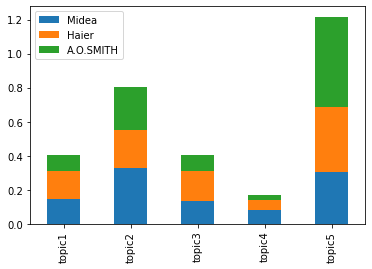

In [127]:
df2.plot.bar(stacked=True)

In [133]:
df3 = pd.DataFrame(total_p,index=['Midea', 'Haier','A.O.SMITH'],columns=['topic1', 'topic2', 'topic3','topic4','topic5'])
df3

,topic1,topic2,topic3,topic4,topic5
Midea,0.148728,0.330724,0.134051,0.084149,0.302348
Haier,0.161538,0.223077,0.176923,0.053846,0.384615
A.O.SMITH,0.095402,0.252874,0.091954,0.029885,0.529885


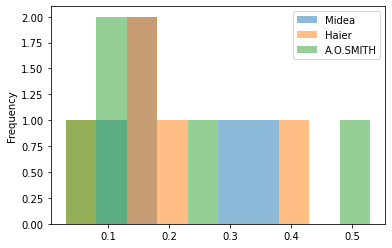

In [134]:
df2.plot.hist(alpha=0.5)
plt.show()